In [1]:
import pandas as pd
import logging

# Log fayl manzili
log_path = r"C:\Users\Rasulbek907\Desktop\Project_8\Log\feature_selection.log"

# Log sozlamalari
logging.basicConfig(
    filename=log_path,
    filemode='a',  # Append mode
    format='%(asctime)s - %(levelname)s - %(message)s',
    level=logging.INFO
)

try:
    logging.info("CSV fayl o'qilmoqda:...")
    df = pd.read_csv(r"C:\Users\Rasulbek907\Desktop\Project_8\Data\Preprocessing\Preprosessed.csv")
    logging.info(f"Fayl muvaffaqiyatli o'qildi. Satırlar soni: {len(df)} ustunlar soni: {len(df.columns)}")
except Exception as e:
    logging.error(f"CSV faylni o'qishda xatolik: {e}")

In [2]:
df.head()

,Unnamed: 0.1,Unnamed: 0,index,dateCrawled,name,price,vehicleType,yearOfRegistration,powerPS,model,...,seller_gewerblich,seller_privat,offerType_Angebot,offerType_Gesuch,abtest_control,abtest_test,gearbox_automatik,gearbox_manuell,notRepairedDamage_ja,notRepairedDamage_nein
0,0,0.000000,0.000000,0.584454,0.015422,8.521602e-06,0.428571,0.724138,0.090452,0.475806,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1,1,0.000003,0.000003,0.273117,0.391083,4.563481e-06,1.000000,0.482759,0.076884,0.479839,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
2,2,0.000005,0.000005,0.378148,0.332203,6.984919e-07,0.571429,0.379310,0.032663,0.475806,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
3,3,0.000008,0.000008,0.823166,0.733871,1.676381e-06,0.571429,0.620690,0.029648,0.415323,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,4,0.000011,0.000011,0.965794,0.119477,3.026798e-07,0.857143,0.172414,0.046231,0.044355,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322278 entries, 0 to 322277
Data columns (total 28 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Unnamed: 0.1            322278 non-null  int64  
 1   Unnamed: 0              322278 non-null  float64
 2   index                   322278 non-null  float64
 3   dateCrawled             322278 non-null  float64
 4   name                    322278 non-null  float64
 5   price                   322278 non-null  float64
 6   vehicleType             322278 non-null  float64
 7   yearOfRegistration      322278 non-null  float64
 8   powerPS                 322278 non-null  float64
 9   model                   322278 non-null  float64
 10  kilometer               322278 non-null  float64
 11  monthOfRegistration     322278 non-null  float64
 12  fuelType                322278 non-null  float64
 13  brand                   322278 non-null  float64
 14  dateCreated         

# Asosiy ma’lumotlarni tekshirish

In [4]:
# DataFrame o'lchami
print("Shape:", df.shape)

Shape: (322278, 28)


In [5]:
# Ustunlar nomi va turlari
print(df.dtypes)


Unnamed: 0.1                int64
Unnamed: 0                float64
index                     float64
dateCrawled               float64
name                      float64
price                     float64
vehicleType               float64
yearOfRegistration        float64
powerPS                   float64
model                     float64
kilometer                 float64
monthOfRegistration       float64
fuelType                  float64
brand                     float64
dateCreated               float64
nrOfPictures              float64
postalCode                float64
lastSeen                  float64
seller_gewerblich         float64
seller_privat             float64
offerType_Angebot         float64
offerType_Gesuch          float64
abtest_control            float64
abtest_test               float64
gearbox_automatik         float64
gearbox_manuell           float64
notRepairedDamage_ja      float64
notRepairedDamage_nein    float64
dtype: object


In [6]:
# Har bir ustundagi NaN qiymatlar soni
print(df.isna().sum())

Unnamed: 0.1              0
Unnamed: 0                0
index                     0
dateCrawled               0
name                      0
price                     0
vehicleType               0
yearOfRegistration        0
powerPS                   0
model                     0
kilometer                 0
monthOfRegistration       0
fuelType                  0
brand                     0
dateCreated               0
nrOfPictures              0
postalCode                0
lastSeen                  0
seller_gewerblich         0
seller_privat             0
offerType_Angebot         0
offerType_Gesuch          0
abtest_control            0
abtest_test               0
gearbox_automatik         0
gearbox_manuell           0
notRepairedDamage_ja      0
notRepairedDamage_nein    0
dtype: int64


In [7]:
# Statistik tavsif (faqat raqamli ustunlar)
print(df.describe().T)

                           count           mean           std  min  \
Unnamed: 0.1            322278.0  161138.500000  93033.789364  0.0   
Unnamed: 0              322278.0       0.500057      0.288447  0.0   
index                   322278.0       0.500057      0.288447  0.0   
dateCrawled             322278.0       0.501554      0.289166  0.0   
name                    322278.0       0.499202      0.290974  0.0   
price                   322278.0       0.000007      0.001777  0.0   
vehicleType             322278.0       0.647377      0.240213  0.0   
yearOfRegistration      322278.0       0.487130      0.212064  0.0   
powerPS                 322278.0       0.058863      0.035273  0.0   
model                   322278.0       0.408576      0.282641  0.0   
kilometer               322278.0       0.835272      0.268507  0.0   
monthOfRegistration     322278.0       0.496967      0.300365  0.0   
fuelType                322278.0       0.282354      0.178004  0.0   
brand               

In [8]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include='object').columns.tolist()

print("Numerical columns:", numerical_cols)
print("Categorical columns:", categorical_cols)

Numerical columns: ['Unnamed: 0.1', 'Unnamed: 0', 'index', 'dateCrawled', 'name', 'price', 'vehicleType', 'yearOfRegistration', 'powerPS', 'model', 'kilometer', 'monthOfRegistration', 'fuelType', 'brand', 'dateCreated', 'nrOfPictures', 'postalCode', 'lastSeen', 'seller_gewerblich', 'seller_privat', 'offerType_Angebot', 'offerType_Gesuch', 'abtest_control', 'abtest_test', 'gearbox_automatik', 'gearbox_manuell', 'notRepairedDamage_ja', 'notRepairedDamage_nein']
Categorical columns: []


In [9]:
target = 'kilometer'
X = df.drop(columns=[target])
y = df[target]

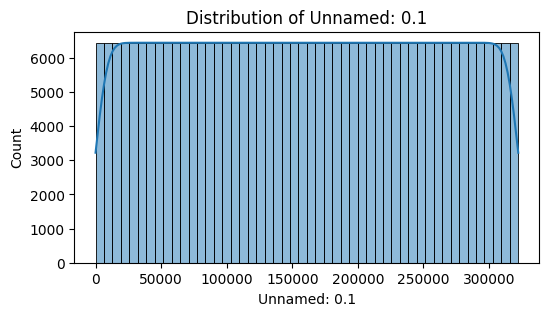

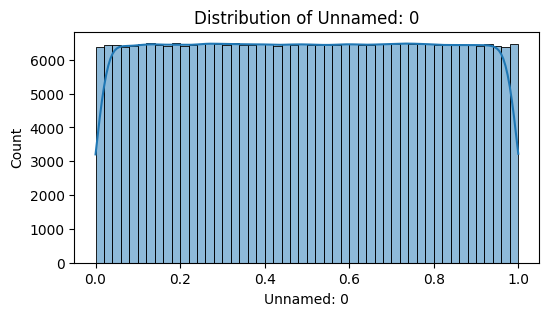

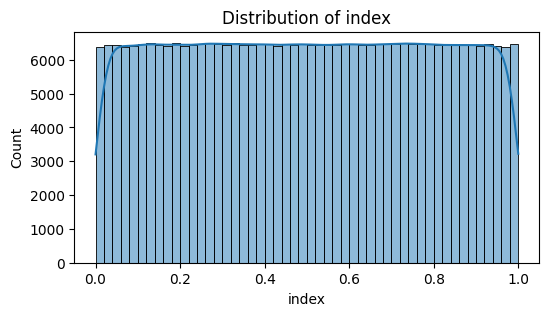

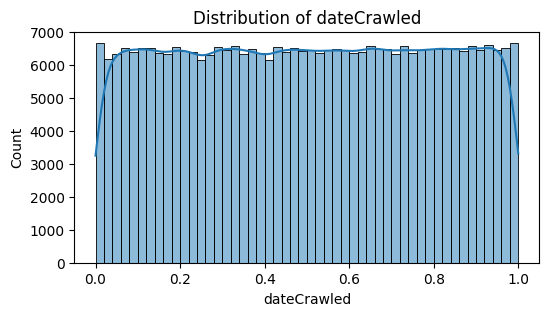

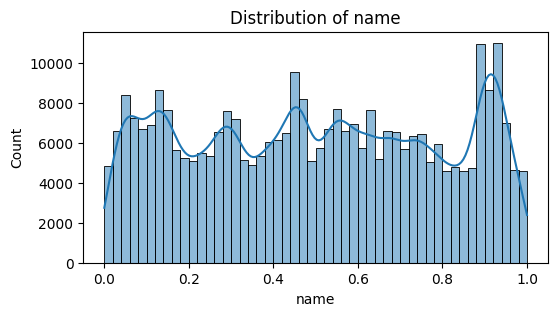

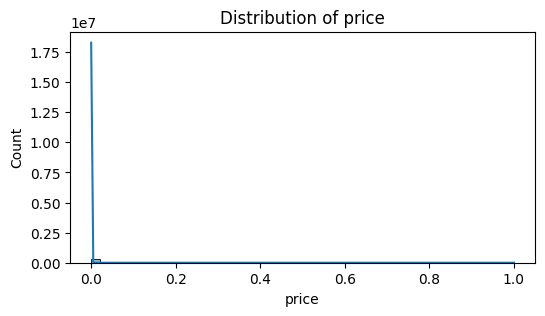

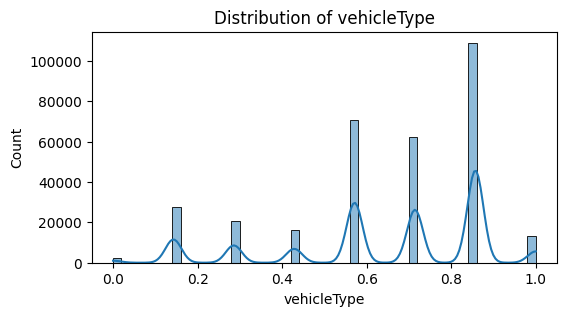

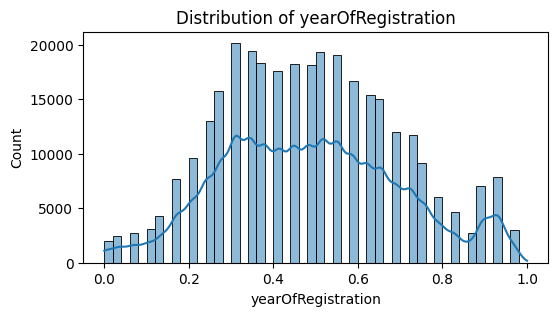

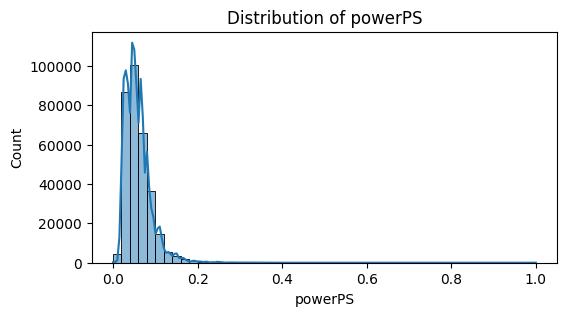

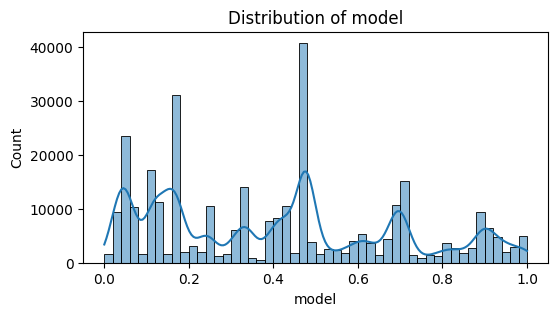

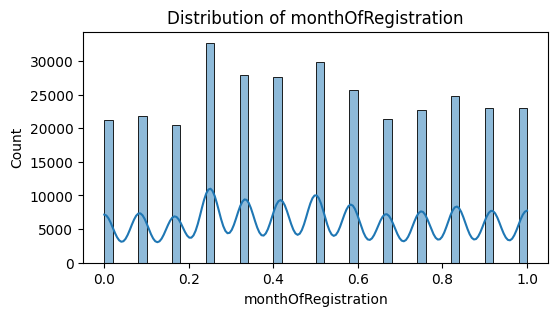

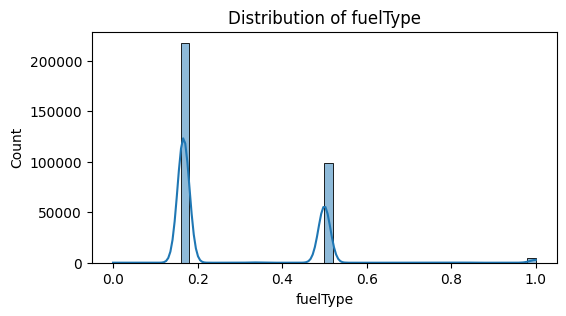

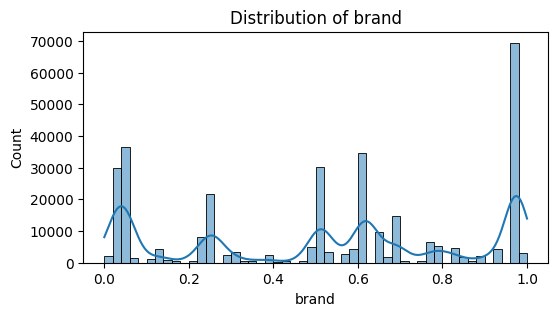

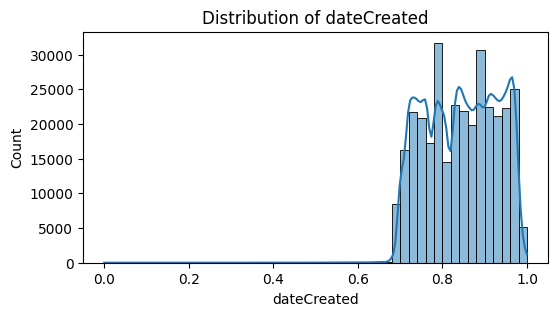

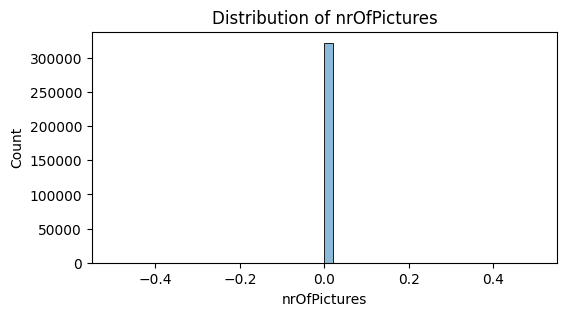

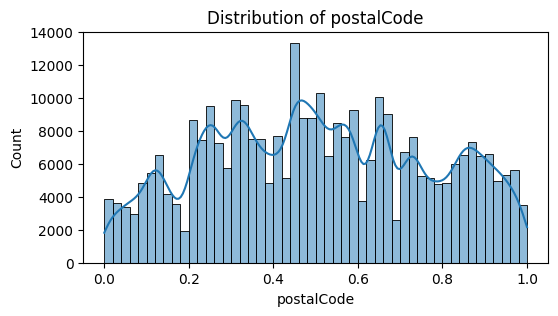

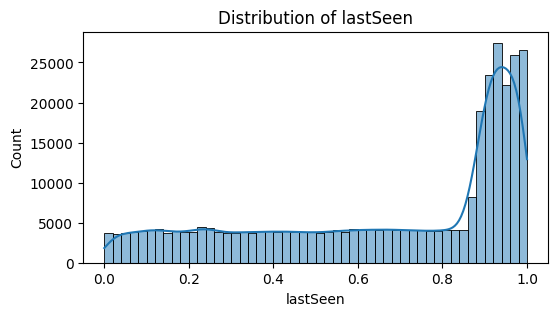

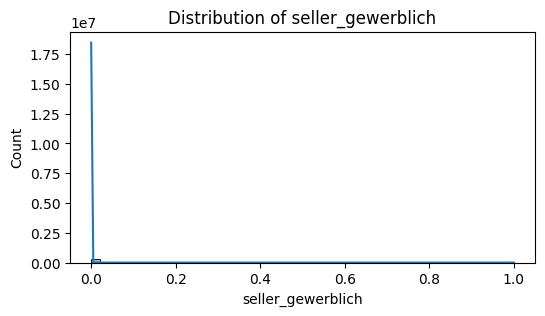

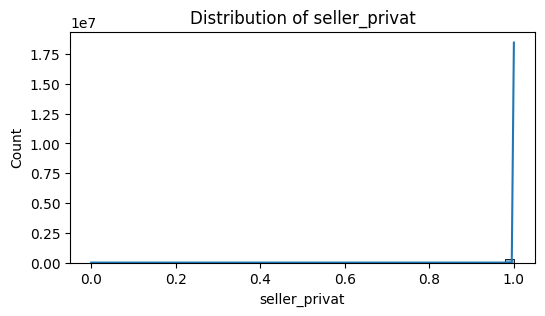

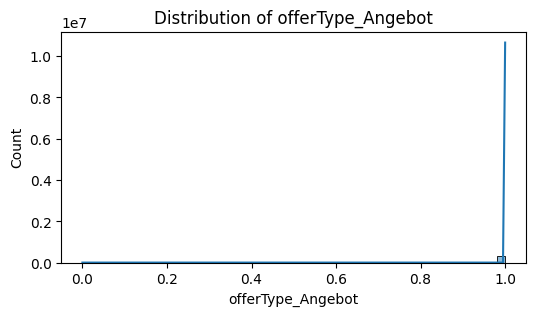

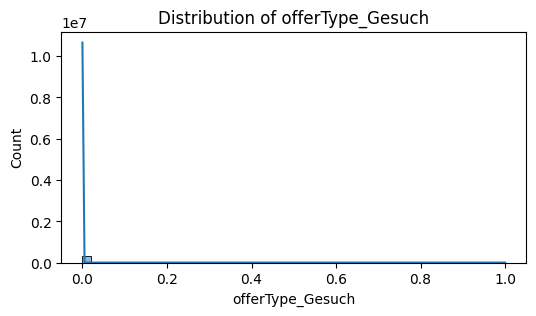

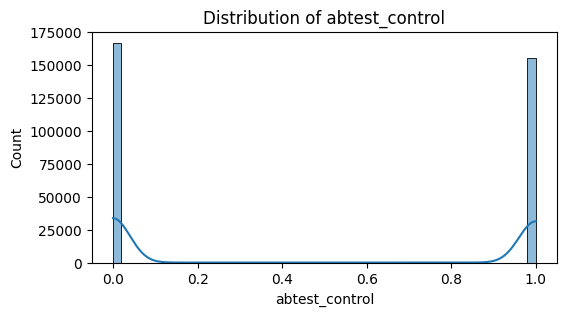

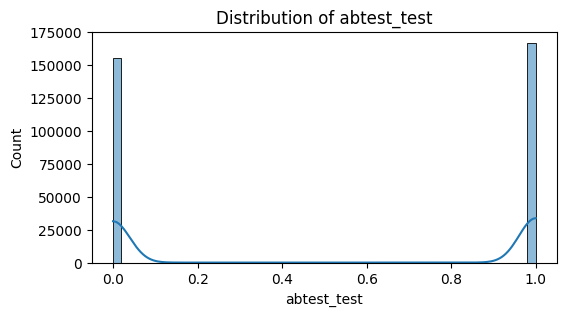

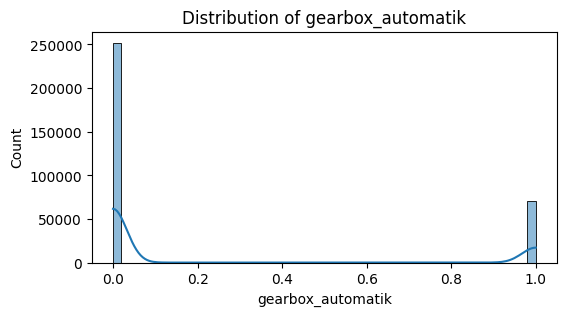

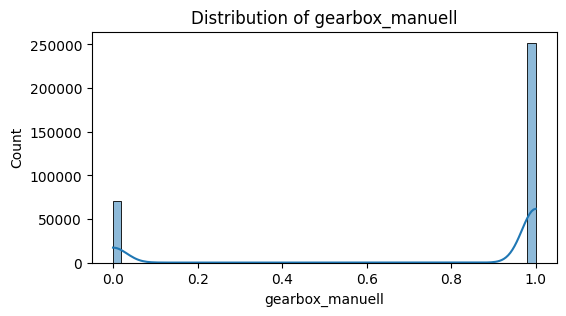

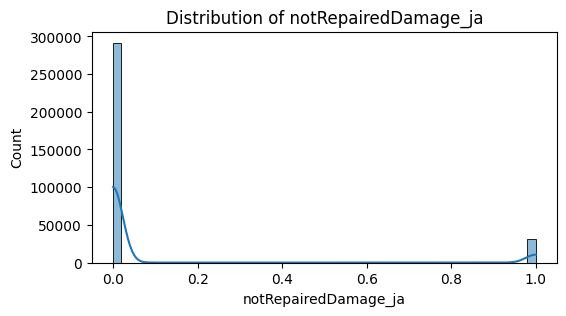

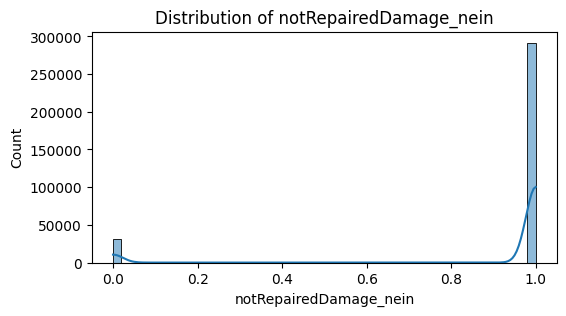

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogramlar va Outlier tahlili
for col in numerical_cols:
    if col != target:
        plt.figure(figsize=(6,3))
        sns.histplot(df[col], bins=50, kde=True)
        plt.title(f'Distribution of {col}')
        plt.show()

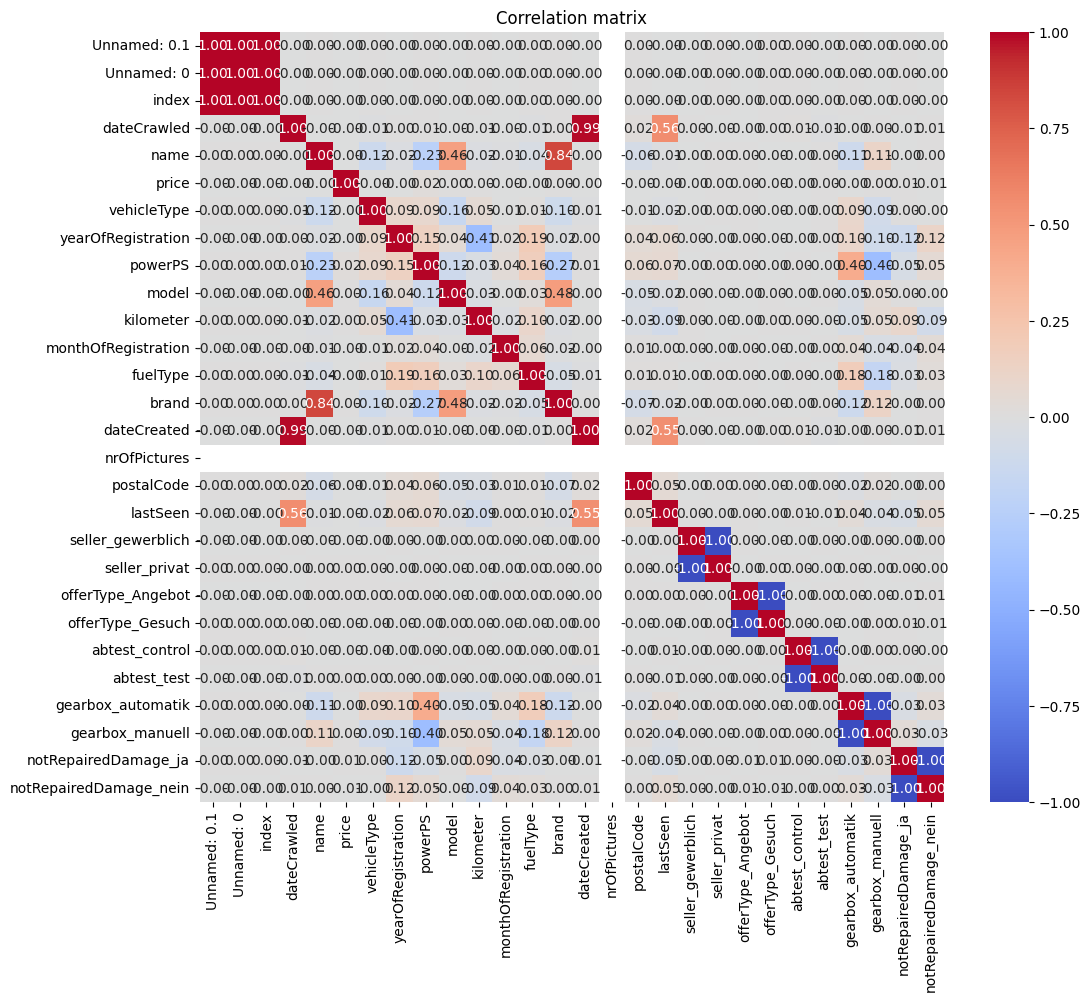

kilometer                 1.000000
fuelType                  0.098373
notRepairedDamage_ja      0.091029
vehicleType               0.051376
gearbox_manuell           0.049569
index                     0.004042
Unnamed: 0                0.004042
Unnamed: 0.1              0.004041
abtest_control            0.002617
offerType_Gesuch          0.001872
seller_gewerblich         0.001081
price                     0.000025
seller_privat            -0.001081
offerType_Angebot        -0.001872
abtest_test              -0.002617
dateCreated              -0.003137
dateCrawled              -0.005156
brand                    -0.021362
name                     -0.021984
monthOfRegistration      -0.022180
model                    -0.027113
postalCode               -0.033304
powerPS                  -0.033381
gearbox_automatik        -0.049569
lastSeen                 -0.089016
notRepairedDamage_nein   -0.091029
yearOfRegistration       -0.405711
nrOfPictures                   NaN
Name: kilometer, dty

In [11]:
corr_matrix = df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation matrix")
plt.show()

# Target bilan korelatsiya
print(corr_matrix[target].sort_values(ascending=False))

In [1]:
from IPython.display import display, HTML

# Clickable link (button ko‘rinishida)
display(HTML("""
<a href="feature_enginering.ipynb" target="_self" style="
    display: inline-block;
    padding: 10px 20px;
    font-size: 16px;
    color: white;
    background-color: #4CAF50;
    text-align: center;
    text-decoration: none;
    border-radius: 5px;
">
Next Step
</a>
"""))
